### Visualization of control sims

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from palettable.colorbrewer.sequential import YlGn_9

from ideotype.data_process import read_sims, read_data, parse_mature
from ideotype import DATA_PATH

In [2]:
# control
#df_sims, df_issues = read_sims('/home/disk/eos8/ach315/upscale/sims/control/')
#df_sims.to_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/files/sims_6105_control.csv', index=False)

In [3]:
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_control.yml')
df_extended, df_stuck = parse_mature(df_all)

### Overall sim results

In [4]:
print(df_matured.shape[0]/df_all.shape[0])
print(df_extended.shape[0]/df_all.shape[0])
print(df_stuck.shape[0]/df_all.shape[0])

0.8384649709950914
0.004462293618920125
0.1570727353859884


### Map of all simulation results

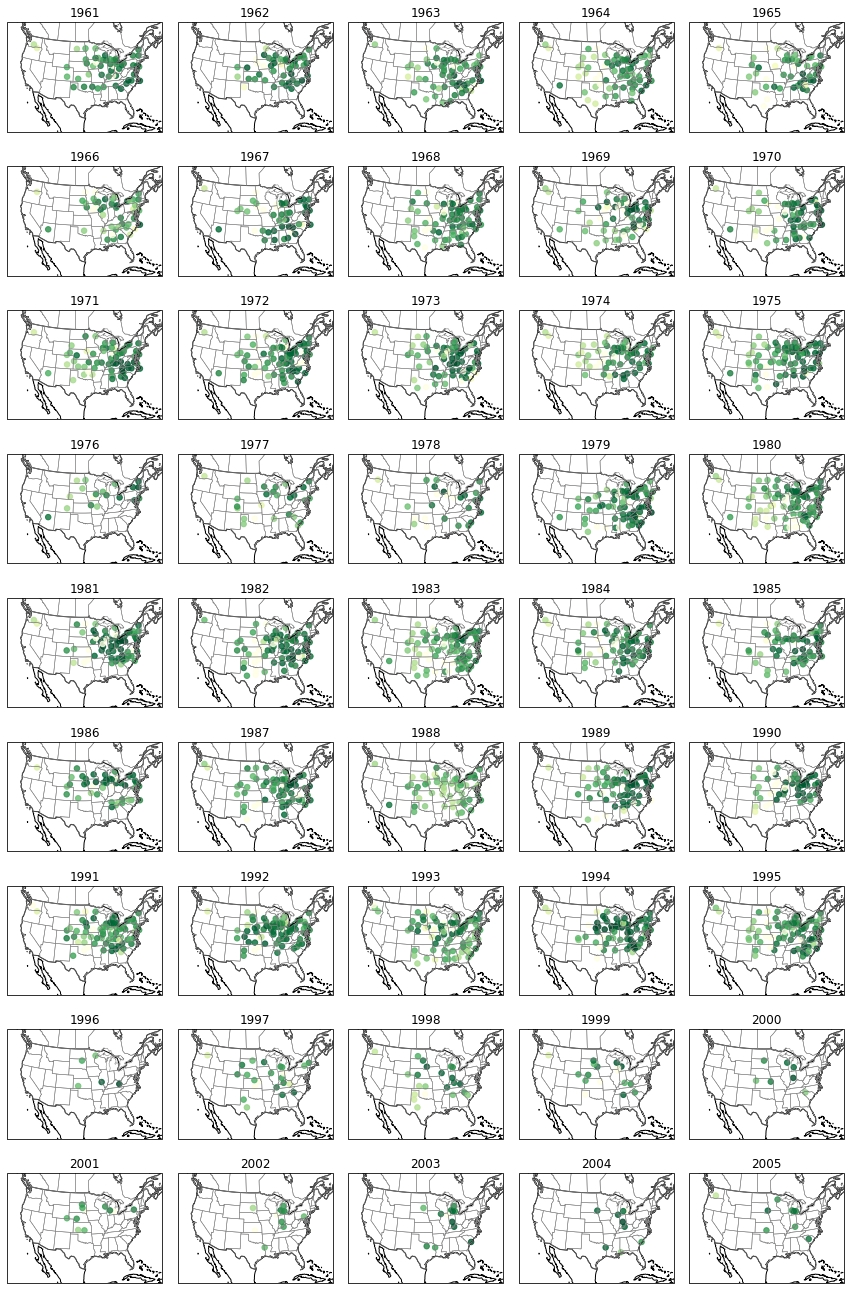

In [5]:
years = np.arange(1961, 2006)
extent = [-123, -72, 19, 53]

fig = plt.figure(figsize=(15,30))

for item, year in zip(np.arange(len(years)), years):
    ax = fig.add_subplot(9,5,item+1, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))
    df_sub = df_all[df_all.year == year]
    ax.scatter(df_sub.lon, df_sub.lat, 
               c=df_sub.dm_ear, cmap=YlGn_9.mpl_colormap,
               transform=ccrs.PlateCarree(), alpha=0.8, s=30,
               vmin=0, vmax=200) 

    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set(title=year)

fig.subplots_adjust(wspace=0.1, hspace=-0.7)

### Map of matured-only simulation results

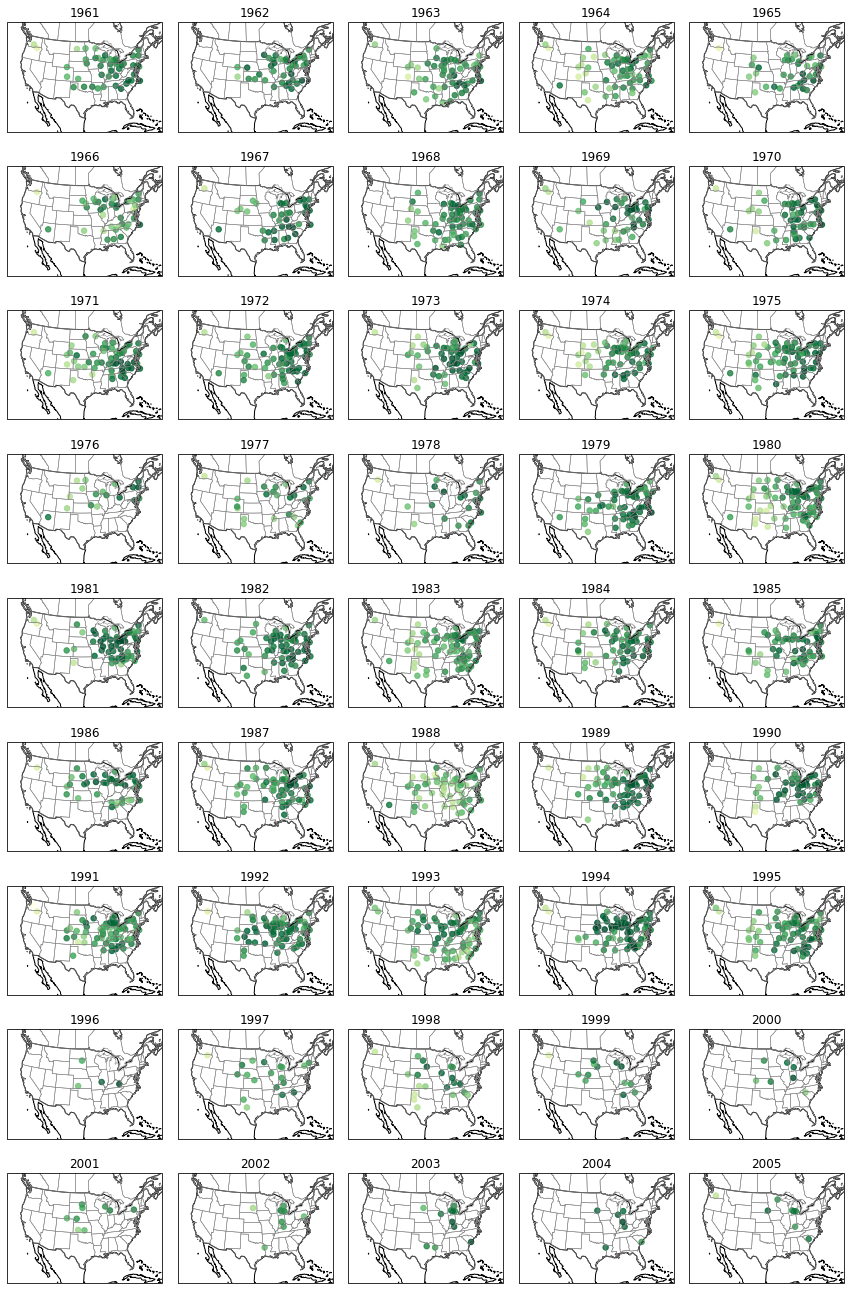

In [6]:
years = np.arange(1961, 2006)
extent = [-123, -72, 19, 53]

fig = plt.figure(figsize=(15,30))

for item, year in zip(np.arange(len(years)), years):
    ax = fig.add_subplot(9,5,item+1, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))
    df_sub = df_matured[df_matured.year == year]
    ax.scatter(df_sub.lon, df_sub.lat, 
               c=df_sub.dm_ear, cmap=YlGn_9.mpl_colormap,
               transform=ccrs.PlateCarree(), alpha=0.8, s=30,
               vmin=0, vmax=200) 

    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set(title=year)

fig.subplots_adjust(wspace=0.1, hspace=-0.7)

### Map of simulations that exceeded growing season (11/29)

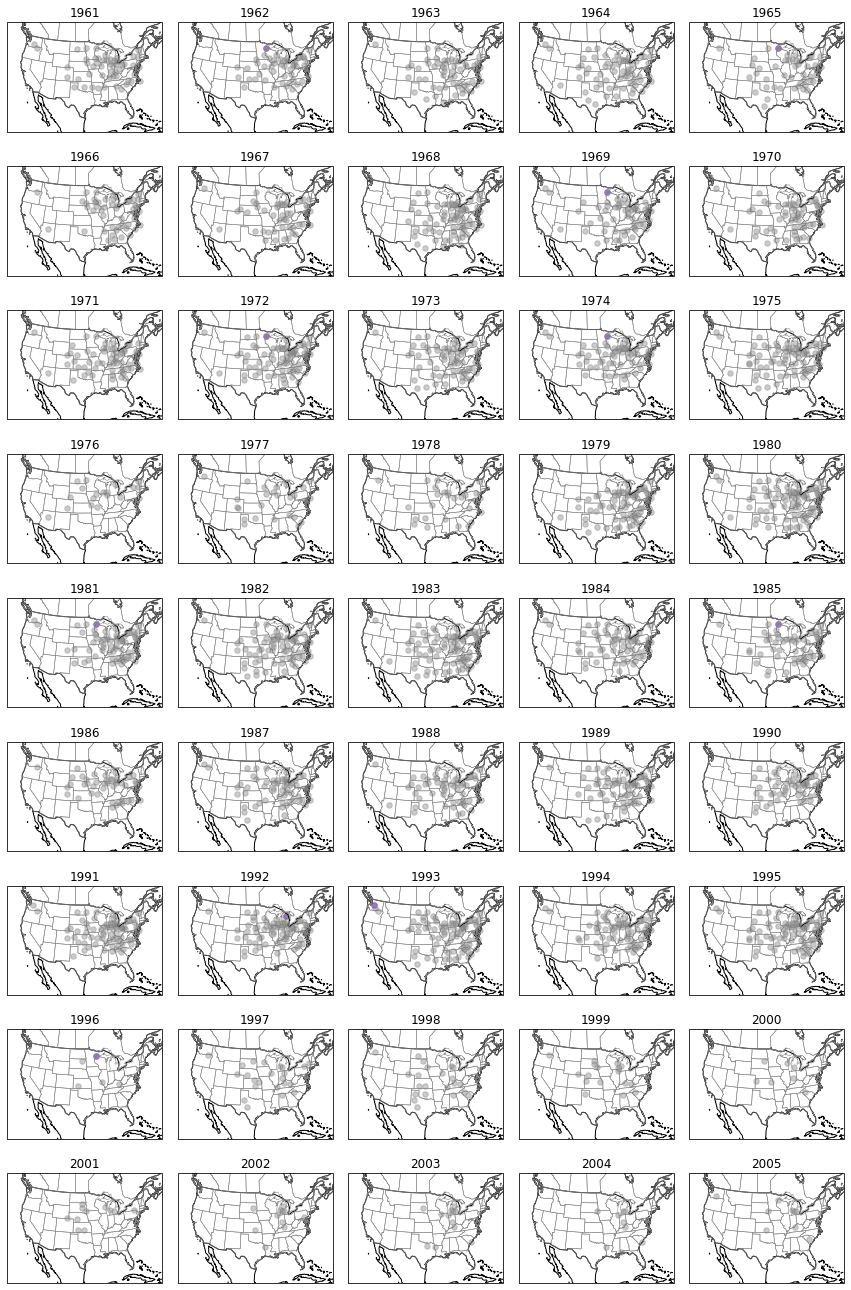

In [7]:
years = np.arange(1961, 2006)
extent = [-123, -72, 19, 53]

fig = plt.figure(figsize=(15,30))

for item, year in zip(np.arange(len(years)), years):
    ax = fig.add_subplot(9,5,item+1, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))

    # all sim sites
    df_sub = df_all[df_all.year == year]
    ax.scatter(df_sub.lon, df_sub.lat, c='tab:grey',
               transform=ccrs.PlateCarree(), alpha=0.4, s=30) 
    
    # sites that extended over growing season
    df_sub = df_extended[df_extended.year == year]
    ax.scatter(df_sub.lon, df_sub.lat, c='tab:purple',
               transform=ccrs.PlateCarree(), alpha=0.8, s=30) 

    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set(title=year)

fig.subplots_adjust(wspace=0.1, hspace=-0.7)

### Map of simulations that failed to reach maturity within 20 mins

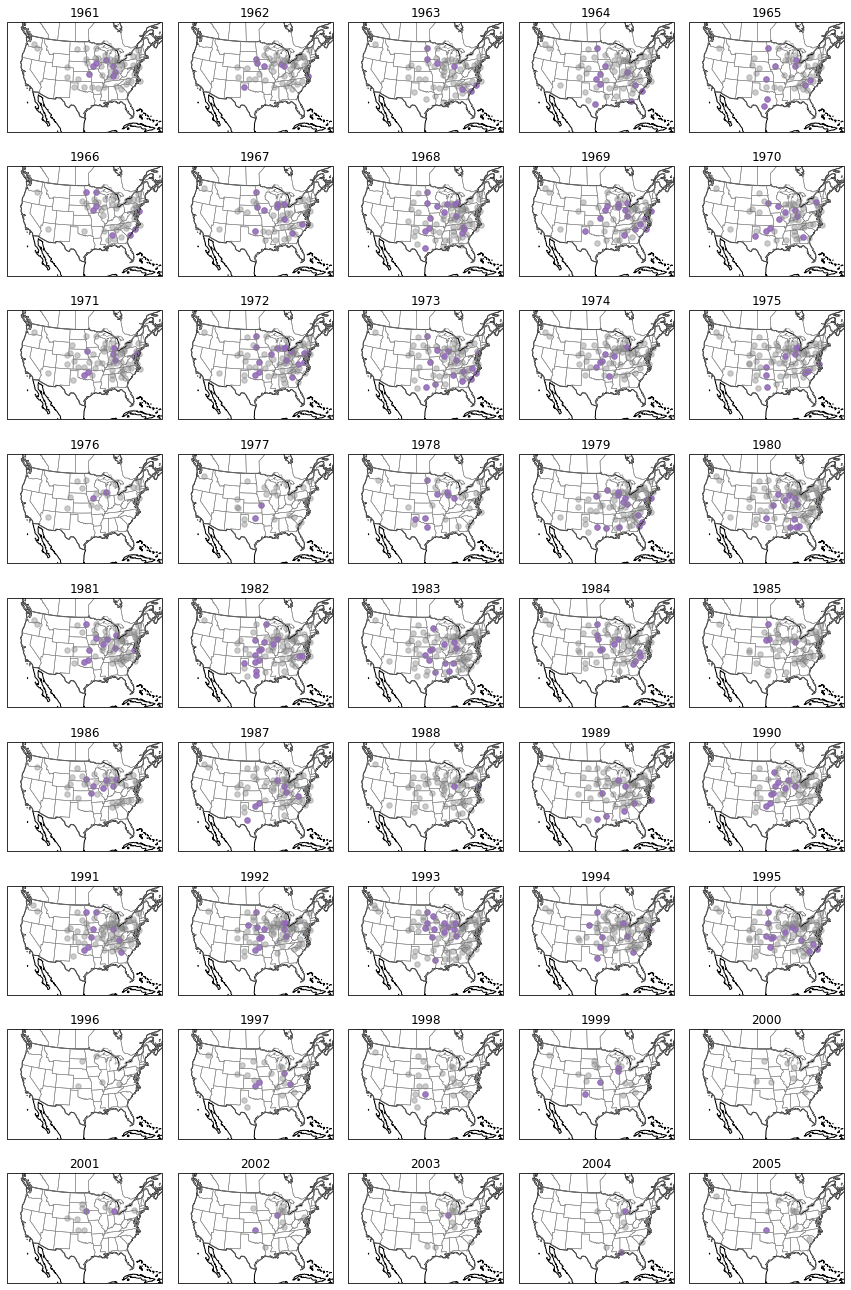

In [8]:
years = np.arange(1961, 2006)
extent = [-123, -72, 19, 53]

fig = plt.figure(figsize=(15,30))

for item, year in zip(np.arange(len(years)), years):
    ax = fig.add_subplot(9,5,item+1, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))

    # all sim sites
    df_sub = df_all[df_all.year == year]
    ax.scatter(df_sub.lon, df_sub.lat, c='tab:grey',
               transform=ccrs.PlateCarree(), alpha=0.4, s=30) 
    
    # sites that extended over growing season
    df_sub = df_stuck[df_stuck.year == year]
    ax.scatter(df_sub.lon, df_sub.lat, c='tab:purple',
               transform=ccrs.PlateCarree(), alpha=0.8, s=30) 

    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.set(title=year)

fig.subplots_adjust(wspace=0.1, hspace=-0.7)

### Simtime estimation

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime

df_simtime = pd.read_csv('~/ideotype/simtime.csv')
start = df_simtime.start
end = df_simtime.end

times_start = [datetime.strptime(
    start, '%m/%d/%y %H:%M') for start in df_simtime.start]
times_end = [datetime.strptime(
    end, '%m/%d/%y %H:%M') for end in df_simtime.end]

sim_hours = [round((times_end[item] - times_start[item]).seconds/3600, 2)
             for item in np.arange(len(times_end))]
df_simtime['simtime'] = sim_hours

df_siteyears = pd.read_csv('~/upscale/weadata/siteyears_filtered.csv')
sites = list(df_siteyears.groupby('year').count().site.values)
df_simtime.sort_values(by=['group', 'year'], inplace=True)
df_simtime['sites'] = sites

df_simtime['simtime_persite'] = (df_simtime.simtime/df_simtime.sites)*60

years = np.arange(1961, 2006)
simed_sites = []
for year in years:
    simed_sites.append(int(df_sims.query(f'year=={year}').shape[0]))
df_simtime['simed_sites'] = simed_sites
df_simtime['simed_percent'] = [np.round((simed_sites[item]/sites[item])*100, 2) for item in np.arange(len(sites))]

df_simtime['simetime_persite'] = (df_simtime.simtime/df_simtime.sites)*60

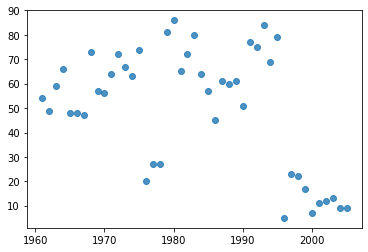

In [11]:
# TODO: make this a bar graph
plt.scatter(df_simtime.query('group == "control"').year, 
            df_simtime.query('group == "control"').sites, alpha=0.8)

In [12]:
soils_all = df_all.groupby('texture').count().year
soils_failed = df_stuck.groupby('texture').count().year
df_soilsinfo = pd.DataFrame({'soils_all': soils_all,
                             'soils_failed': soils_failed})

soils_percent = [np.round((df_soilsinfo.soils_failed[item]/df_soilsinfo.soils_all[item])*100, 2) for item in np.arange(df_soilsinfo.shape[0])]
df_soilsinfo['soils_percent'] = soils_percent
df_soilsinfo

,soils_all,soils_failed,soils_percent
texture,,,
ClLo,158,71,44.94
Lo,179,1,0.56
LoSa,35,2,5.71
SaClLo,45,4,8.89
SaLo,571,74,12.96
SiCl,80,72,90.00
SiClLo,233,110,47.21
SiLo,940,18,1.91


In [16]:
df_wea = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/data/control/724460_1982.txt', sep='\t')
df_wea.head()

,jday,date,hour,solrad,temp,precip,rh,co2
0,60,'03/01/1982',18,1.0,16.1,0.0,45.37,400
1,60,'03/01/1982',19,0.0,15.0,0.0,50.83,400
2,60,'03/01/1982',20,0.0,13.9,0.0,54.64,400
3,60,'03/01/1982',21,0.0,13.9,0.0,54.64,400
4,60,'03/01/1982',22,0.0,12.8,0.0,58.75,400


In [20]:
df_sites.query('site=="724460"')

,site,class,station,state,tzone,lat,lon,years,area,perct_irri,texture
64,724460,1,KANSAS CITY INT'L ARPT,MO,-6,39.3,-94.717,20,10384.2496,0.922852,SiClLo


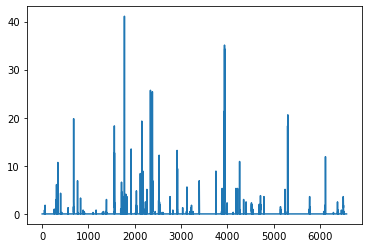

In [18]:
plt.plot(df_wea.precip)

In [24]:
df_wea.precip.sum()

1006.8000000000001